# Detect chessboard

In [3]:
import multicam_calibration as mcc
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_central.aviencoded.overlay-0-12142.mp4


100%|█████████████████████████| 12142/12142 [00:27<00:00, 438.52frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-bottom.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1198.48frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-left.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1123.98frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-right.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1134.51frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-top.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1211.75frame/s]


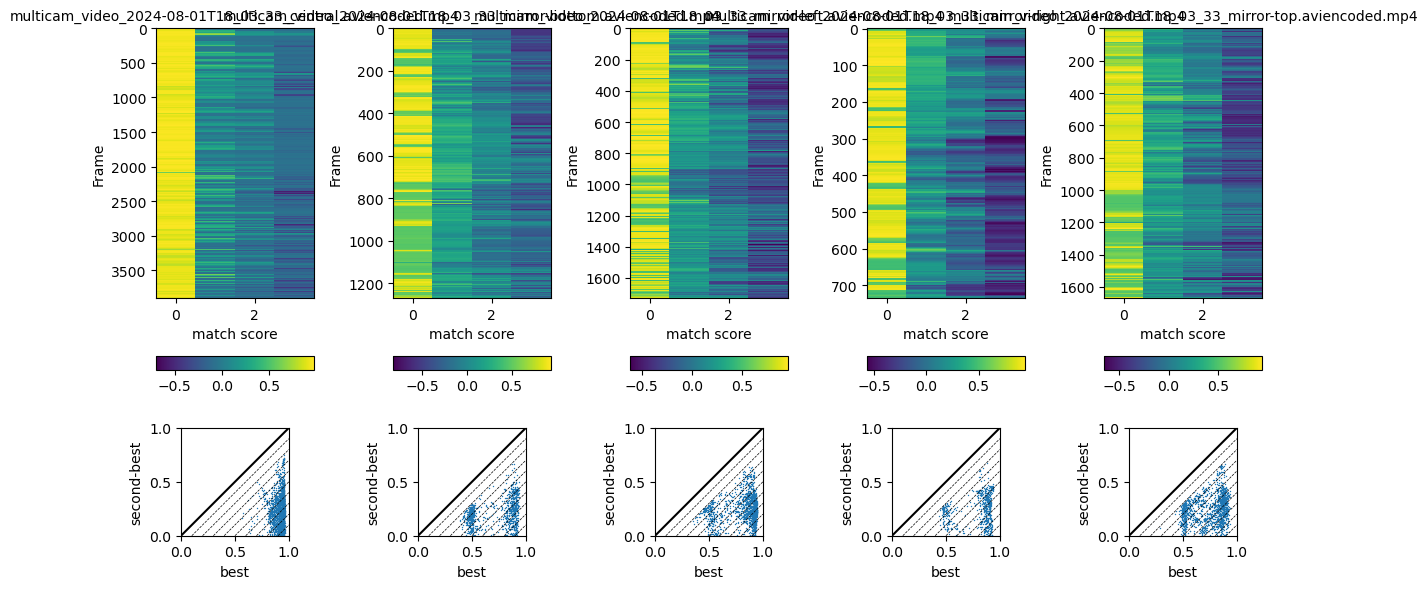

In [4]:
board_shape = (5,7)
square_size = 12.5

# camera_names = ['top', 'side1', 'side2', 'side3', 'side4', 'bottom']
# prefix = '../../tests/example_data/example_calibration'
#data_dir = Path("/Users/vigji/Desktop/dest_dir/18042024")  # /Calibration/Basler_acA1440-220um__40075240__20240418_180540771_cropped
data_dir = Path(r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906")
#video_paths = sorted([f for f in (data_dir.glob("Calibration/*/*.mp4")) if "overlay" not in f.stem])[::-1]
#camera_names = [p.stem.split("_")[-1].split(".detections")[0] for p in video_paths] 

#video_paths = [str(f) for f in video_paths]
video_paths = [str(f) for f in data_dir.iterdir() if f.suffix == '.mp4' and 'overlay' not in f.stem]

#detect calibration object in each video
all_calib_uvs, all_img_sizes = mcc.run_calibration_detection(
    video_paths, mcc.detect_chessboard, n_workers=6,
    detection_options=dict(board_shape=board_shape, scale_factor=0.5))

# display a table with the detections shared between camera pairs
mcc.summarize_detections(all_calib_uvs)

# plot corner-match scores for each frame
fig = mcc.plot_chessboard_qc_data(video_paths)

# optionally generate overlay videos
for p in video_paths:
    mcc.overlay_detections(p, overwrite=True)
fig.savefig(data_dir / "checkerboard_errors.png")

In [104]:
video_paths

['D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\20240801\\Calibration\\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\\multicam_video_2024-08-01T18_03_33_central.aviencoded.mp4',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\20240801\\Calibration\\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\\multicam_video_2024-08-01T18_03_33_mirror-bottom.aviencoded.mp4',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\20240801\\Calibration\\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\\multicam_video_2024-08-01T18_03_33_mirror-left.aviencoded.mp4',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\20240801\\Calibration\\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\\multicam_video_2024-08-01T18_03_33_mirror-right.aviencoded.mp4',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\20240801\\Calibration\\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\\multicam_video_2024-08-01T18_03_33_

# Calibrate

Check for Luigi:

- all_calib_uvs matrix when is created by the calibration images
- shape, dtype, filling values fror missed detections

All params passed to the mcc.calibrate function

In [191]:
all_calib_uvs.shape

(5, 12142, 35, 2)

## Initialization

In [7]:
calib_objpoints = mcc.generate_chessboard_objpoints(board_shape, square_size)
s = slice(None, None)
import flammkuchen as fl
fl.save(r"D:\SNeurobiology\Desktop\luigidelete\args_calibration.h5", dict(all_calib_uvs=all_calib_uvs[s], all_img_sizes=all_img_sizes[s], calib_objpoints=calib_objpoints))

In [8]:

all_extrinsics, all_intrinsics, calib_poses, spanning_tree = mcc.calibrate(
    all_calib_uvs[:, s, :, :], all_img_sizes, calib_objpoints, root=0, n_samples_for_intrinsics=100)
fig.savefig(data_dir / "shared_detections.png")


Estimating camera intrinsics


100%|████████████████████████████████████| 5/5 [12:58<00:00, 155.69s/it]


Initializing calibration object poses


100%|█████████████████████████████████████| 5/5 [00:02<00:00,  1.85it/s]


Estimating camera extrinsics
Merging calibration object poses


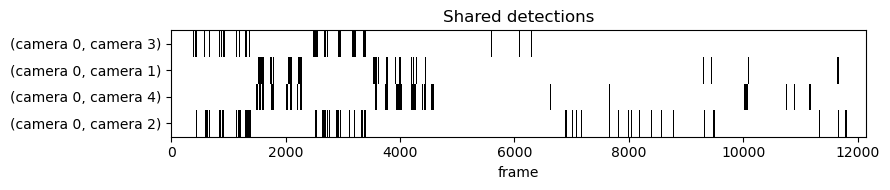

In [9]:
fig, shared_detections = mcc.plot_shared_detections(all_calib_uvs, spanning_tree)

In [10]:
valid = ((~np.isnan(all_calib_uvs[1, :, 0, 0]))&(~np.isnan(all_calib_uvs[0, :, 0, 0]))).astype(int)
np.sum(valid)

590

In [11]:
import tqdm
import cv2
n_cameras, n_frames, N, _ = all_calib_uvs.shape
median_error = np.zeros(n_cameras)
reprojections = np.zeros((n_cameras, n_frames, N, 2))
transformed_reprojections = np.zeros((n_cameras, n_frames, N, 2)) * np.nan
pts = mcc.embed_calib_objpoints(calib_objpoints, calib_poses)

errors_list = []
for cam in tqdm.trange(n_cameras):
    reprojections[cam] = mcc.project_points(
        pts, all_extrinsics[cam], all_intrinsics[cam][0]
    )
    uvs_undistorted = mcc.undistort_points(all_calib_uvs[cam], *all_intrinsics[cam])
    valid_ixs = np.nonzero(~np.isnan(uvs_undistorted).any((-1, -2)))[0]
    for t in valid_ixs:
        H = cv2.findHomography(uvs_undistorted[t], calib_objpoints[:, :2])
        transformed_reprojections[cam, t] = cv2.perspectiveTransform(
            reprojections[cam, t][np.newaxis], H[0]
        )[0]

    errors = np.linalg.norm(
        transformed_reprojections[cam, valid_ixs] - calib_objpoints[:, :2],
        axis=-1,
    )
    median_error[cam] = np.median(errors)
    errors_arr = np.zeros(n_frames)*np.nan
    errors_arr[valid_ixs] = np.median(errors, axis=1)
    errors_list.append(errors_arr)

100%|██████████| 5/5 [00:01<00:00,  2.65it/s]


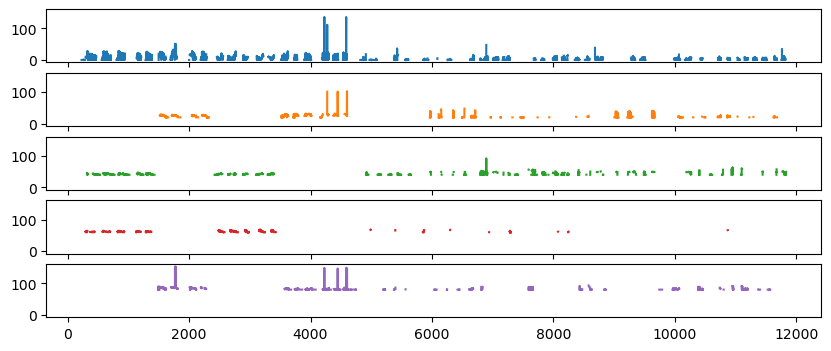

In [12]:
f, axs = plt.subplots(len(errors_list), 1, figsize=(10, 4), sharex=True, sharey=True)

for i, errors in enumerate(errors_list):
    axs[i].plot(errors + i*20, c=f"C{i}")
# plt.plot(errors_list[0].mean(1))

100%|██████████| 5/5 [00:01<00:00,  2.66it/s]


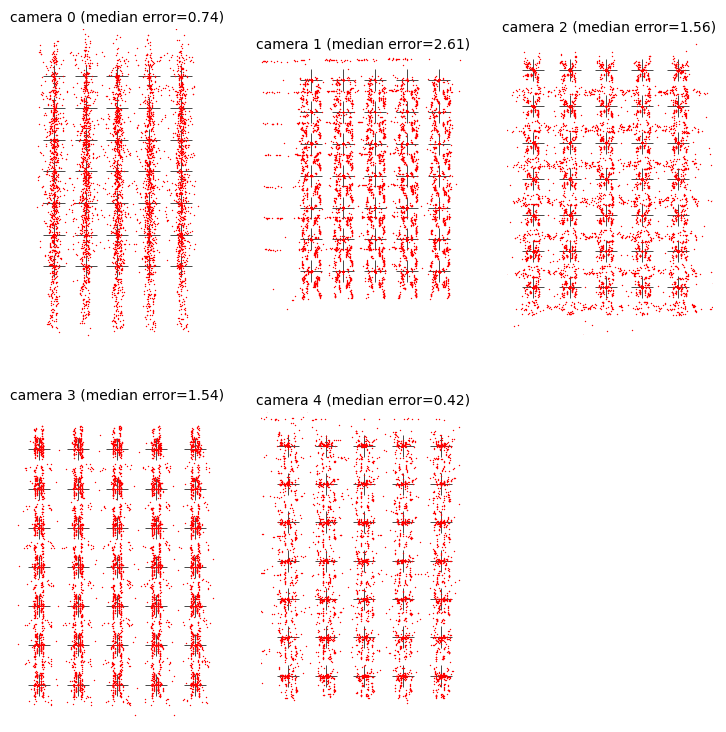

In [13]:
#    cam_names=['top', 'side1', 'side2', 'side3', 'side4', 'bottom'],
s = slice(0, None)
fig, median_error, reprojections, transformed_reprojections = mcc.plot_residuals(
    all_calib_uvs[:, s, :, :], all_extrinsics, all_intrinsics, calib_objpoints, calib_poses[s, :], 

    inches_per_axis=3)
fig.savefig(data_dir / "first_residuals.png")

## Bundle adjustment

In [14]:
adj_extrinsics, adj_intrinsics, adj_calib_poses, use_frames, result = \
    mcc.bundle_adjust(all_calib_uvs, all_extrinsics, all_intrinsics, calib_objpoints, calib_poses, n_frames=None, ftol=1e-4)

Excluding 184 out of 2172 frames based on an outlier threshold of 24.747211887183433
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0415e+06                                    5.71e+07    
       1              7         8.9218e+05      1.49e+05       6.85e+02       3.21e+07    
       2              8         6.8502e+05      2.07e+05       2.08e+02       3.13e+07    
       3              9         5.2784e+05      1.57e+05       4.12e+02       1.58e+07    
       4             10         4.2034e+05      1.08e+05       2.74e+02       2.07e+07    
       5             11         3.7786e+05      4.25e+04       3.03e+02       1.52e+07    
       6             12         3.3373e+05      4.41e+04       3.37e+02       1.62e+07    
       7             13         3.2144e+05      1.23e+04       3.56e+02       9.89e+06    
       8             14         2.9300e+05      2.84e+04       9.12e+01       9.43e+06    
     

In [15]:
nan_counts = np.isnan(all_calib_uvs).sum((0, 1, 2, 3))

100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


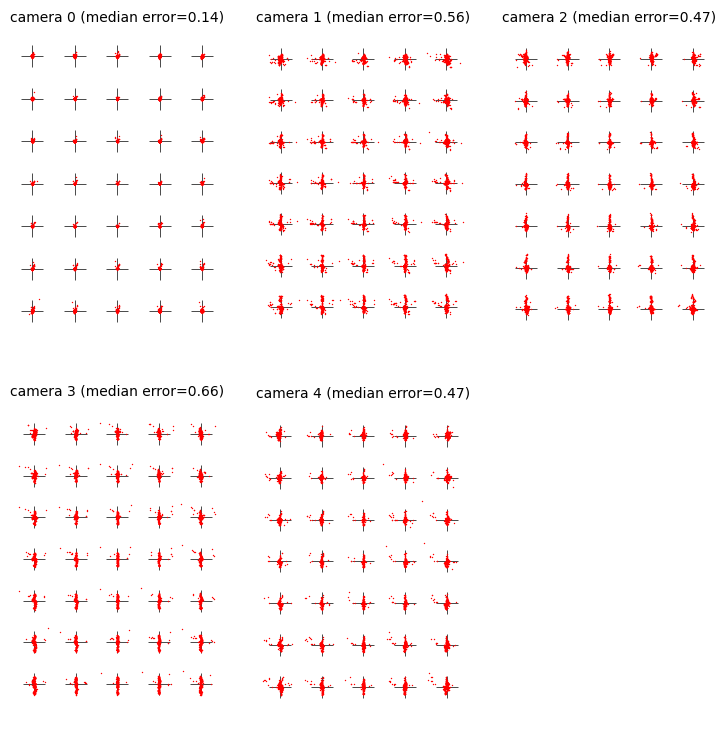

In [16]:
fig, median_error, reprojections, transformed_reprojections = mcc.plot_residuals(
    all_calib_uvs[:,use_frames], adj_extrinsics, adj_intrinsics, calib_objpoints, adj_calib_poses, inches_per_axis=3)
fig.savefig(data_dir / "refined_residuals.png")

# Save results

In [43]:
# save for JARVIS
camera_names = ['bottom', 'side1', 'side2', 'side3', 'side4']
video_dir = data_dir / "calibration_vals"
save_path = f'{video_dir}/CalibrationParameters/'
mcc.save_calibration(all_extrinsics, all_intrinsics, camera_names, save_path, save_format='jarvis')

# save for GIMBAL
save_path = f'{video_dir}/camera_params.h5'
mcc.save_calibration(all_extrinsics, all_intrinsics, camera_names, save_path, save_format='gimbal')
# save for GIMBAL
save_path = f'{video_dir}/camera_params_adj.h5'
mcc.save_calibration(adj_extrinsics, adj_intrinsics, camera_names, save_path, save_format='gimbal')

In [67]:
save_path = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\calibration_vals\camera_params_adj.h5"

In [68]:
data = mcc.load_calibration(save_path, load_format='gimbal')

In [72]:
all_extrinsics, all_intrinsics, camera_names = data

In [78]:
all_extrinsics = 

5

In [74]:
all_extrinsics, all_intrinsics = np.array(all_extrinsics), np.array(all_intrinsics)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5, 2) + inhomogeneous part.

In [172]:
(adj_extrinsics*1000).astype(int)

array([[      0,       3,       9,   -2926,    2713, -104834],
       [     96,    2230,   -2150,  -53844,  997335,  932809],
       [   1250,   -1199,    1194,   22305,  994101,  898054],
       [   1221,    1137,   -1190,  -38886, 1081463,  844842],
       [   1606,      24,     -23,   35272, 1002394,  935253]])

In [173]:
(all_extrinsics*1000).astype(int)

array([[      0,       0,       0,       0,       0,       0],
       [     55,    2210,   -2197,  -30415, 1030863,  838327],
       [   1240,   -1192,    1193,   23902, 1011759,  873576],
       [   1231,    1157,   -1191,  -32803, 1080243,  846414],
       [   1650,      12,     -13,   21501,  994267,  907907]])

In [ ]:
all_traing_try = 

In [174]:
all_triang = []
for i in tqdm.tqdm(range(35)):
    all_triang.append(mcc.triangulate(all_calib_uvs[:, :, i, :], all_extrinsics, all_intrinsics))
all_triang = np.array(all_triang)

100%|██████████| 35/35 [00:20<00:00,  1.71it/s]


In [175]:
all_calib_uvs.shape

(5, 12142, 35, 2)

In [95]:
np.array(all_triang).shape

(0,)

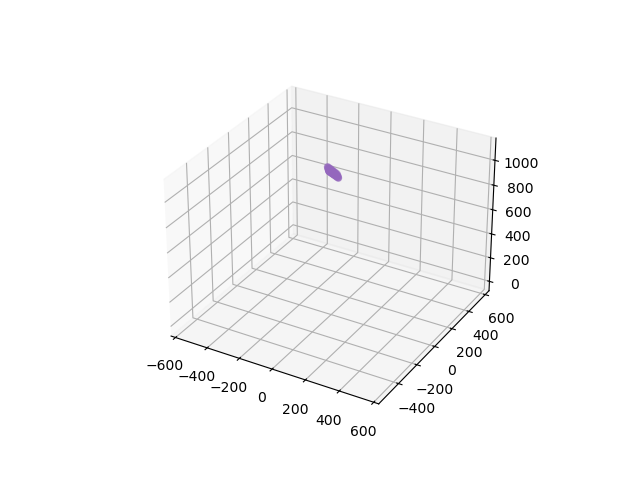

In [176]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(10):
    off = 8000 + i*10
    ax.scatter(all_triang[:, off, 0], all_triang[:, off, 1],all_triang[:, off, 2] )
# ax.scatter(all_triang[:, ::100, 0].flatten(), 
#            all_triang[:, ::100, 1].flatten(),
#            all_triang[:, ::100, 2].flatten() )
set_axes_equal(ax)

NameError: name 'set_axes_equal' is not defined

### try triangulation

In [19]:
file = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\M1\111238\multicam_video_2024-08-01T11_14_48_20241025-110012.json"

import json

with open(file) as f:
    d = json.load(f)
    print(d)

[{'transform': 'central', 'output_file_suffix': 'central.avi', 'filters': 'crop=600.0:620.0:250.0:240.0,format=gray', 'ffmpeg_args': {'-c:v': 'libx264', '-b:v': '30M', '-crf': '1', '-preset': 'veryfast', '-pix_fmt': 'gray', '-c:a': 'copy'}}, {'transform': 'mirror-top', 'output_file_suffix': 'mirror-top.avi', 'filters': 'crop=600.0:220.0:250.0:20.0,format=gray,transpose=2,transpose=2,hflip', 'ffmpeg_args': {'-c:v': 'libx264', '-b:v': '30M', '-crf': '1', '-preset': 'veryfast', '-pix_fmt': 'gray', '-c:a': 'copy'}}, {'transform': 'mirror-bottom', 'output_file_suffix': 'mirror-bottom.avi', 'filters': 'crop=600.0:220.0:250.0:860.0,format=gray,hflip', 'ffmpeg_args': {'-c:v': 'libx264', '-b:v': '30M', '-crf': '1', '-preset': 'veryfast', '-pix_fmt': 'gray', '-c:a': 'copy'}}, {'transform': 'mirror-left', 'output_file_suffix': 'mirror-left.avi', 'filters': 'crop=220.0:620.0:30.0:240.0,format=gray,transpose=2,hflip', 'ffmpeg_args': {'-c:v': 'libx264', '-b:v': '30M', '-crf': '1', '-preset': 'veryfa

In [128]:
coordinates = d[-1]

In [20]:
coordinates = d[-1]

In [23]:
coordinates

{'points_coordinate': {'central': array([[-1.28285788e-01,  1.50775583e+00],
         [ 4.52613441e+00,  5.93782726e+02],
         [ 6.11927970e+02,  5.99600751e+02],
         [ 6.11927970e+02,  2.67136088e+00],
         [ 3.66622096e+01,  3.78449450e+01],
         [ 4.02089430e+01,  5.51668558e+02],
         [ 5.67598938e+02,  5.49302083e+02],
         [ 5.70105769e+02,  3.67002749e+01]]),
  'mirror-top': array([[220.62830221,  52.87661533],
         [217.79663161, 536.14839764],
         [193.82303558, 470.20353711],
         [197.61157282, 115.3093835 ],
         [ 21.86514734,  48.01450054],
         [ 18.06715446, 534.50116357],
         [ 51.96278325, 466.53993072],
         [ 66.34405005, 114.2478856 ]]),
  'mirror-bottom': array([[187.91295656, 490.56769756],
         [187.69334235, 138.30278324],
         [211.81092864,  68.99006852],
         [212.19820742, 545.28696189],
         [ 53.39432791, 489.93490228],
         [ 55.91873389, 138.78571328],
         [ 63.4012885 ,  66

In [21]:
coordinates_views = coordinates['points_coordinate']

for key, value in coordinates_views.items():
    coordinates_views[key] = np.array(value)

In [22]:
coordinates_views['central'][:, 0].shape

(8,)

In [13]:
import os
import sys

sys.path.append("../complete_pipeline")
from utils import  read_first_frame

In [26]:
# display each coordinate on the cropped image, 
import cv2
import matplotlib.pyplot as plt
from pathlib import Path


dir_path = Path(r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\M1\111238\multicam_video_2024-08-01T11_14_48_cropped_20240923170906")
first_frames ={}
names = ['central', 'bottom', 'left', 'right', 'top'] 
a = -1
for i in dir_path.iterdir():
    if i.suffix == '.avi':
        a += 1



        video_path = i
        first_frames[names[a]]= read_first_frame(str(video_path))

In [43]:
first_frames_n = {}
for value, key in zip(first_frames.values(), coordinates_views.keys()):
    first_frames_n[key] = value

In [44]:
first_frames_n.keys()

dict_keys(['central', 'mirror-top', 'mirror-bottom', 'mirror-left', 'mirror-right'])

In [40]:
coordinates_views.keys()

dict_keys(['central', 'mirror-top', 'mirror-bottom', 'mirror-left', 'mirror-right'])

In [46]:
coordinates_views

{'central': array([[-1.28285788e-01,  1.50775583e+00],
        [ 4.52613441e+00,  5.93782726e+02],
        [ 6.11927970e+02,  5.99600751e+02],
        [ 6.11927970e+02,  2.67136088e+00],
        [ 3.66622096e+01,  3.78449450e+01],
        [ 4.02089430e+01,  5.51668558e+02],
        [ 5.67598938e+02,  5.49302083e+02],
        [ 5.70105769e+02,  3.67002749e+01]]),
 'mirror-top': array([[220.62830221,  52.87661533],
        [217.79663161, 536.14839764],
        [193.82303558, 470.20353711],
        [197.61157282, 115.3093835 ],
        [ 21.86514734,  48.01450054],
        [ 18.06715446, 534.50116357],
        [ 51.96278325, 466.53993072],
        [ 66.34405005, 114.2478856 ]]),
 'mirror-bottom': array([[187.91295656, 490.56769756],
        [187.69334235, 138.30278324],
        [211.81092864,  68.99006852],
        [212.19820742, 545.28696189],
        [ 53.39432791, 489.93490228],
        [ 55.91873389, 138.78571328],
        [ 63.4012885 ,  66.00411506],
        [ 24.56286053, 554.64911

In [60]:
plt.clf()

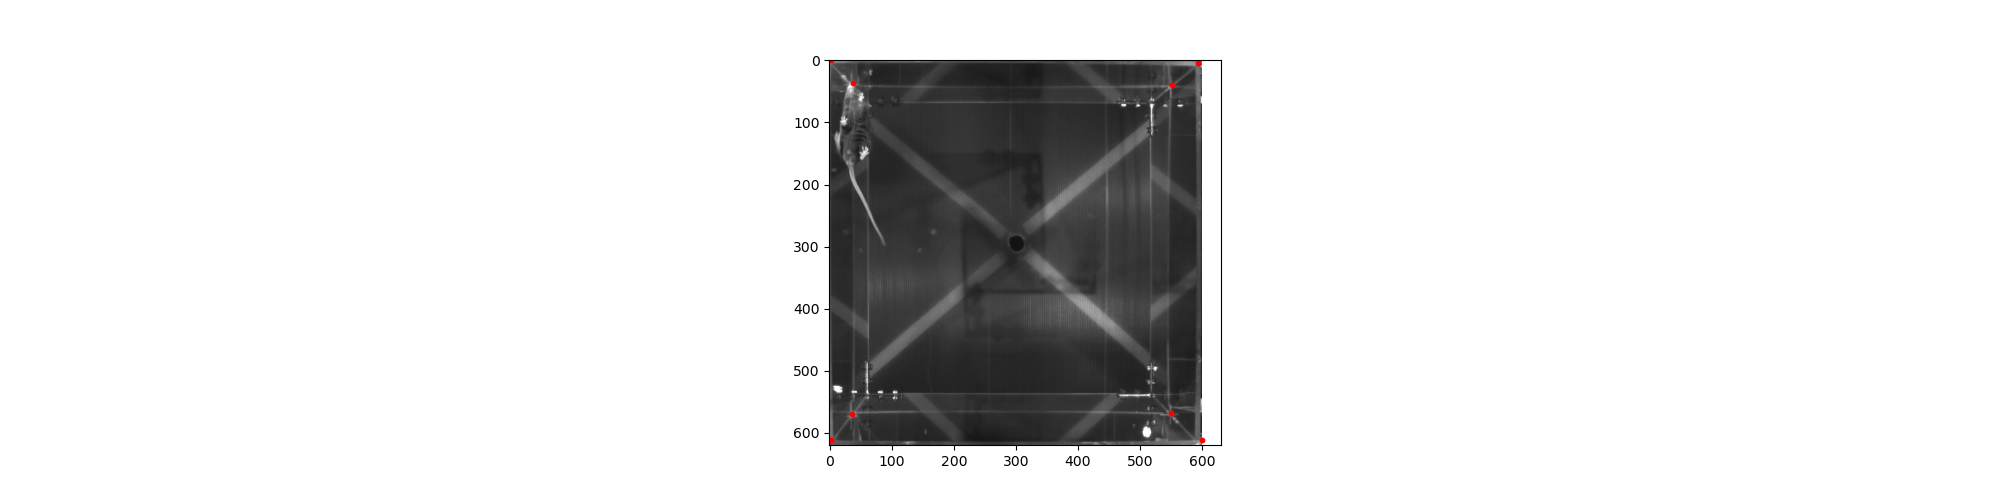

In [61]:
plt.imshow(first_frames_n['central'], cmap='gray')
plt.scatter(coordinates_views['central'][:, 1], coordinates_views['central'][:, 0], c='r', s=10)
plt.show()

In [152]:
import numpy as np

In [24]:
coordinates_ars = {}
for key, value in coordinates['points_coordinate'].items():
    coordinates_ars[key] = np.array(value)
    

In [25]:
coordinates_ars['central'].shape

(8, 2)

In [183]:
import matplotlib.pyplot as plt

In [26]:
all_arr = list(coordinates['points_coordinate'].values())
concatenated_arr = [np.expand_dims(np.array(arr), 0) for arr in all_arr]
right_arr = np.stack(concatenated_arr, axis=0)

In [27]:
right_arr.shape

(5, 1, 8, 2)

In [33]:
arr_resized = np.zeros_like(right_arr)
arr_resized[..., 0] = right_arr[..., 0] * (620/600)
arr_resized[..., 1] = right_arr[..., 1] * (224/200)

In [38]:
all_triang1 = []
for i in tqdm.tqdm(range(8)):
    all_triang1.append(mcc.triangulate(right_arr[:, :, i, [1, 0]], adj_extrinsics, adj_intrinsics))
all_triang1 = np.array(all_triang1)

100%|██████████| 8/8 [00:00<00:00, 902.44it/s]


In [39]:
all_triang1

array([[[-160.75438702, -124.14958884,  993.90524114]],

       [[ -67.19584747,   81.67184077,  979.6247484 ]],

       [[ 115.07265241,  151.47883106,  980.41120251]],

       [[  37.06138205,  -55.72962322,  989.97944781]],

       [[-158.18769988, -118.4493489 , 1126.5583802 ]],

       [[ -75.27348871,   54.16533527, 1128.54079912]],

       [[  95.15012442,  145.76328246, 1106.67312194]],

       [[  -6.8761095 ,  -60.73101757, 1128.48907716]]])

In [40]:
data = all_triang1
data = data.reshape(8, 3)


In [43]:
!pip install plotly

In [44]:
import plotly.express as px

fig = px.scatter_3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], text=range(8))
fig.show()

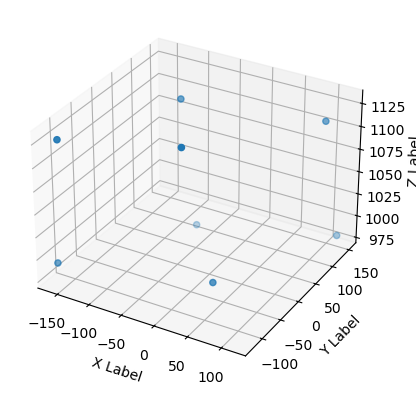

In [42]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()
ax = fig.add_subplot(projection='3d')




ax.scatter(data[:, 0], data[:, 1], data[:, 2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<Figure size 640x480 with 0 Axes>

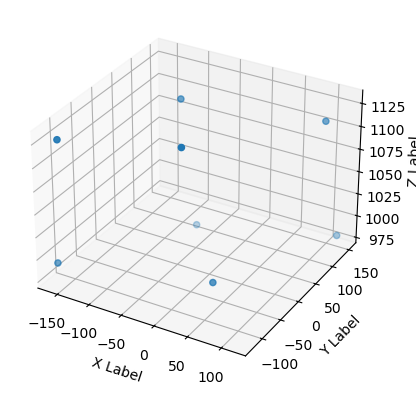

In [41]:
plt.clf()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')



ax.scatter(data[:, 0], data[:, 1], data[:, 2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [83]:
list(coordinates['points_coordinate'].values())

[[[-0.12828578776372979, 1.5077558337636106],
  [4.526134411887995, 593.7827262394451],
  [611.9279704664376, 599.6007514890098],
  [611.9279704664376, 2.6713608836765275],
  [36.662209580421234, 37.84494497804775],
  [40.208942962058984, 551.6685584247004],
  [567.5989381911708, 549.3020825569407],
  [570.1057690947475, 36.70027485352381]],
 [[220.62830220885579, 52.876615329947754],
  [217.7966316094108, 536.1483976352245],
  [193.82303558066482, 470.20353711184293],
  [197.61157282253583, 115.30938350418865],
  [13.719911995482079, 44.52368539228746],
  [13.412734258480555, 540.3191888218382],
  [54.289993351257465, 468.8671408160395],
  [66.34405004505658, 114.24788559800157]],
 [[187.912956564222, 490.56769755941093],
  [187.69334235365477, 138.30278323518314],
  [211.81092863956383, 68.99006852182663],
  [212.19820741913122, 545.2869618908057],
  [53.39432791189813, 489.9349022757878],
  [55.918733893026, 138.78571327526709],
  [49.43802789806034, 63.67690495556769],
  [16.417625

In [72]:
for key, value in parameters.items():
    try:
        print(key, value.shape)
    except:
        continue 

dist_coefs (5, 5)
intrinsic (5, 3, 3)
rotation (5, 3, 3)
translation (5, 3)


### Sanity Check

In [130]:
# plot the same point over each  frame to check for consistency
import pickle
coord_path = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240803\M4\140337\right_coords.pkl"
with open(coord_path, 'rb') as f:
    coordinates = pickle.load(f)

In [133]:

ars = [value for value in coordinates.values()]
uncropped_coordinates = np.stack(ars, axis=0)

In [135]:
uncropped_coordinates[:, 0, :]

array([[ 239.87171421,  251.50775583],
       [  19.37169779,  302.87661533],
       [1047.91295656,  359.43230244],
       [ 298.57021474,   20.83517485],
       [ 366.19973994, 1028.05280287]])

In [136]:
%gui qt5

In [141]:
import napari
from utils import read_first_frame
path = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240803\M4\140337\multicam_video_2024-08-03T14_32_11.avi"
frame = read_first_frame(path)


def inspect_id(frame, i):

    viewer = napari.Viewer()
    viewer.add_image(frame, name="uncropped", contrast_limits=[0, 255])


    points_layer = viewer.add_points(
    uncropped_coordinates[:, i, :],
    size=10,
    name="points",
    edge_color="white",
    edge_width=0.5,
    )
    points_layer.editable = True

    napari.run()
    adjusted_points = points_layer.data


In [142]:
for i in range(8):
    inspect_id(frame, i)

C:\Users\SNeurobiology\AppData\Local\Temp\ipykernel_32252\1693368917.py:13: FutureWarning: Argument 'edge_width' is deprecated, please use 'border_width' instead. The argument 'edge_width' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  points_layer = viewer.add_points(
c:\Users\SNeurobiology\miniconda3\envs\lab-env\lib\site-packages\napari\utils\migrations.py:101: FutureWarning: Argument 'edge_color' is deprecated, please use 'border_color' instead. The argument 'edge_color' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  return func(*args, **kwargs)
C:\Users\SNeurobiology\AppData\Local\Temp\ipykernel_32252\1693368917.py:13: FutureWarning: Argument 'edge_width' is deprecated, please use 'border_width' instead. The argument 'edge_width' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  points_layer = viewer.add_points(
c:\Users\SNeurobiology\miniconda3\envs\lab-env\lib\site-packages\napari\utils\migrations.py:101: FutureWarning: Argument 'edge_color' is d

Here the identities of the points look fine (check only top bottom in central for left point)

Next steps for calibration correction:

- Check identity before cropping
- Check identity after cropping again
- Check if video for calibration are distorting the points

- check expected cameras and stack array